In [1]:
import pandas as pd
import numpy as np

# Data Description

In [2]:
# reading the data
data=pd.read_csv('loan_1.csv')

In [3]:
# getting information of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 56 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   emp_title                         9167 non-null   object 
 1   emp_length                        9183 non-null   float64
 2   state                             10000 non-null  object 
 3   homeownership                     10000 non-null  object 
 4   annual_income                     10000 non-null  float64
 5   verified_income                   10000 non-null  object 
 6   debt_to_income                    9976 non-null   float64
 7   annual_income_joint               1495 non-null   float64
 8   verification_income_joint         1455 non-null   object 
 9   debt_to_income_joint              1495 non-null   float64
 10  delinq_2y                         10000 non-null  int64  
 11  months_since_last_delinq          4342 non-null   float64
 12  earli

We can see that there are 18 float columns , 25 int columns and 13 categorical columns. Also we can observe that a lot of columns have a huge amount of null values present.

In [4]:
#summary statistics on data
data.describe()

,emp_length,annual_income,debt_to_income,annual_income_joint,debt_to_income_joint,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,...,loan_amount,term,interest_rate,installment,balance,paid_total,paid_principal,paid_interest,paid_late_fees,Unnamed: 55
count,9183.000000,1.000000e+04,9976.000000,1.495000e+03,1495.000000,10000.00000,4342.000000,10000.00000,10000.00000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,0.0
mean,5.930306,7.922215e+04,19.308192,1.279146e+05,19.979304,0.21600,36.760709,2001.29000,1.95820,22.679600,...,16361.922500,43.272000,12.427524,476.205323,14458.916610,2494.234773,1894.448466,599.666781,0.119516,NaN
std,3.703734,6.473429e+04,15.004851,7.016838e+04,8.054781,0.68366,21.634939,7.79551,2.38013,11.885439,...,10301.956759,11.029877,5.001105,294.851627,9964.561865,3958.230365,3884.407175,517.328062,1.813468,NaN
min,0.000000,0.000000e+00,0.000000,1.920000e+04,0.320000,0.00000,1.000000,1963.00000,0.00000,2.000000,...,1000.000000,36.000000,5.310000,30.750000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,2.000000,4.500000e+04,11.057500,8.683350e+04,14.160000,0.00000,19.000000,1997.00000,0.00000,14.000000,...,8000.000000,36.000000,9.430000,256.040000,6679.065000,928.700000,587.100000,221.757500,0.000000,NaN
50%,6.000000,6.500000e+04,17.570000,1.130000e+05,19.720000,0.00000,34.000000,2003.00000,1.00000,21.000000,...,14500.000000,36.000000,11.980000,398.420000,12379.495000,1563.300000,984.990000,446.140000,0.000000,NaN
75%,10.000000,9.500000e+04,25.002500,1.515455e+05,25.500000,0.00000,53.000000,2006.00000,3.00000,29.000000,...,24000.000000,60.000000,15.050000,644.690000,20690.182500,2616.005000,1694.555000,825.420000,0.000000,NaN
max,10.000000,2.300000e+06,469.090000,1.100000e+06,39.980000,13.00000,118.000000,2015.00000,29.00000,87.000000,...,40000.000000,60.000000,30.940000,1566.590000,40000.000000,41630.443684,40000.000000,4216.440000,52.980000,NaN


We can see that the range of values has a huge difference for the columns and we need to standardize all the float and int columns as a result.

In [5]:
#Checking value count for each column
for item in data:
    print(item,data[item].value_counts())

emp_title manager                    218
owner                      204
teacher                    201
driver                     123
sales                       97
                          ... 
nurse assistant              1
cantor                       1
multimedia producer          1
loan administrator, avp      1
mlo                          1
Name: emp_title, Length: 4741, dtype: int64
emp_length 10.0    3332
2.0      967
3.0      862
0.0      690
1.0      685
5.0      645
4.0      611
6.0      404
7.0      368
9.0      312
8.0      307
Name: emp_length, dtype: int64
state CA    1330
TX     806
NY     793
FL     732
IL     382
OH     338
NJ     338
GA     334
NC     299
PA     298
VA     261
AZ     255
MD     247
MI     245
MA     237
WA     235
CO     235
CT     181
IN     178
TN     167
MN     159
MO     159
NV     158
SC     145
OR     130
WI     128
AL     122
KY      97
LA      96
KS      89
OK      81
MS      72
AR      70
WV      68
UT      61
NE      56
RI      53
NH     

Here we can check how many times each value comes for every column.

In [6]:
#checking for null values
data.isnull().sum()

emp_title                             833
emp_length                            817
state                                   0
homeownership                           0
annual_income                           0
verified_income                         0
debt_to_income                         24
annual_income_joint                  8505
verification_income_joint            8545
debt_to_income_joint                 8505
delinq_2y                               0
months_since_last_delinq             5658
earliest_credit_line                    0
inquiries_last_12m                      0
total_credit_lines                      0
open_credit_lines                       0
total_credit_limit                      0
total_credit_utilized                   0
num_collections_last_12m                0
num_historical_failed_to_pay            0
months_since_90d_late                7715
current_accounts_delinq                 0
total_collection_amount_ever            0
current_installment_accounts      

We can clearly see that some columns like annual_income_joint,verification_income_joint ,debt_income_joint has huge percentage of null values.Hence these columns can be dropped without loss of a lot of information.

In [7]:
#dropping columns with more than 20% of null values
data.drop(['Unnamed: 55','verification_income_joint','annual_income_joint','debt_to_income_joint','months_since_90d_late','months_since_last_delinq'],axis=1,inplace=True)

In [8]:
data.isnull().sum().sort_values(ascending=False)

months_since_last_credit_inquiry    1271
emp_title                            833
emp_length                           817
num_accounts_120d_past_due           318
debt_to_income                        24
interest_rate                          0
num_mort_accounts                      0
account_never_delinq_percent           0
tax_liens                              0
public_record_bankrupt                 0
loan_purpose                           0
application_type                       0
loan_amount                            0
term                                   0
installment                            0
num_open_cc_accounts                   0
grade                                  0
sub_grade                              0
issue_month                            0
loan_status                            0
initial_listing_status                 0
disbursement_method                    0
balance                                0
paid_total                             0
paid_principal  

In [9]:
# replacing null values with the mode in the respective column
null_columns = data.columns[data.isna().any()].tolist()
for col in null_columns:
    data[col] = data[col].fillna(
    data[col].dropna().mode().values[0] )   

    
data.isnull().sum().sort_values(ascending=False)

emp_title                           0
interest_rate                       0
num_open_cc_accounts                0
num_cc_carrying_balance             0
num_mort_accounts                   0
account_never_delinq_percent        0
tax_liens                           0
public_record_bankrupt              0
loan_purpose                        0
application_type                    0
loan_amount                         0
term                                0
installment                         0
emp_length                          0
grade                               0
sub_grade                           0
issue_month                         0
loan_status                         0
initial_listing_status              0
disbursement_method                 0
balance                             0
paid_total                          0
paid_principal                      0
paid_interest                       0
num_total_cc_accounts               0
total_debit_limit                   0
num_active_d

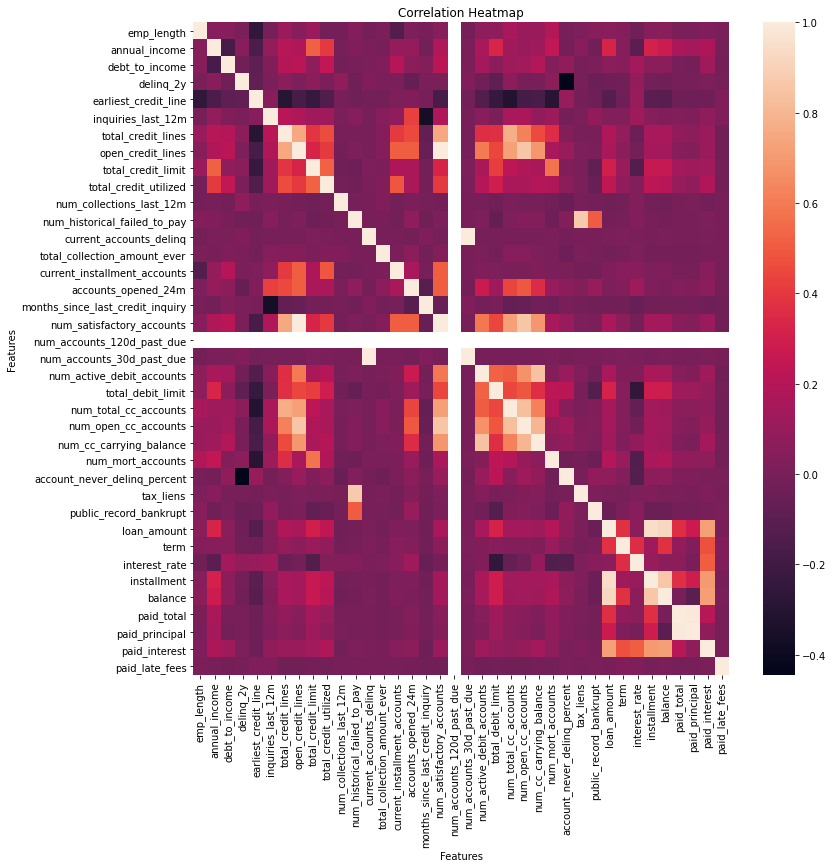

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
#plotting correlation heatmap to find the correlated columns
plt.figure(figsize=(12,12))
sns.heatmap(data.corr())
plt.title("Correlation Heatmap")
plt.xlabel("Features")
plt.ylabel("Features")
plt.show()


We can see from the heatmap that there is high positive correlation(lighter colours) between some column and highly positive correlation(darker colours) between the others.

C:\Users\asadt\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


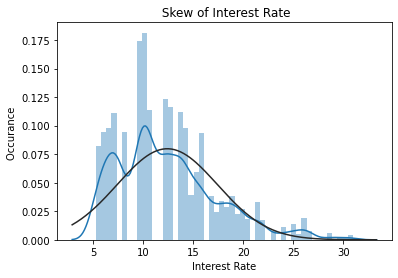

In [11]:
# plotting distanceplot for occurences of different interest rates
def distanceplot(data):
    from scipy.stats import norm
    sns.distplot(data["interest_rate"], fit=norm)
    plt.title(" Skew of Interest Rate")
    plt.xlabel("Interest Rate")
    plt.ylabel("Occurance ")
    plt.show()
    return

distanceplot(data)

As we can see the  distance plot is right skewed which means the occurence of low interest rate is more than that of very high interest rates.Also some models work better on normal data so we might have to handle this during data preprocessing.

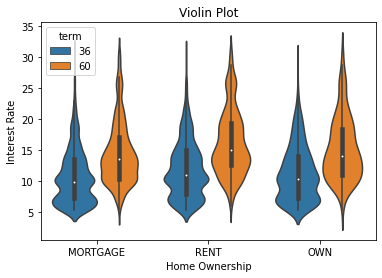

In [12]:
# Violin Plot
def violin_plot(data):
    sns.violinplot(x="homeownership", y="interest_rate", data=data, hue="term")
    plt.title("Violin Plot")
    plt.xlabel("Home Ownership")
    plt.ylabel("Interest Rate")
    plt.show()
    return

violin_plot(data)

The violin plot is the mix of kernel density plot and box plot.We can understand the distribution of the interest rate according to the home ownership of the customers better using the violin plot. 

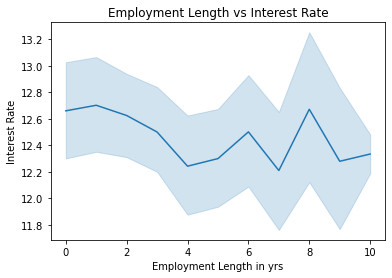

In [13]:
def lineplot(data):
    """
    Employment length vs interest rate
    """
    sns.lineplot(x=data['emp_length'], y=data['interest_rate'])
    plt.title("Employment Length vs Interest Rate")
    plt.xlabel("Employment Length in yrs")
    plt.ylabel("Interest Rate")
    plt.show()
    return

lineplot(data)

In [14]:

#defining function to create boxplot
def get_boxplot(data):
    sns.boxplot(x="variable", y="value", data=pd.melt(data))
    sns.set(rc={'figure.figsize':(20,10)})
    plt.figure(figsize=(20,10))
    plt.show()  
    


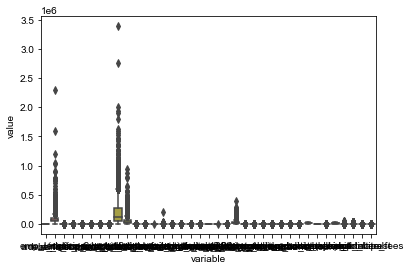

<Figure size 1440x720 with 0 Axes>

In [15]:
# seperating numerical columns and categorical columns and making a boxplot for the numerical columns
y = data["interest_rate"]
data.drop(['interest_rate'],axis=1,inplace=True)
num = data.select_dtypes('number').columns.to_list()
#list of all the categoric columns
obj = data.select_dtypes('object').columns.to_list()

#numeric df
loan_num =  data[num]
#categoric df
loan_obj = data[obj]

get_boxplot(loan_num)


As it is evident from the boxplot the range of values is different and we need to standardize the columns.

The key points we can see from the analysis of the data are:-
   
   1- The data has 10000 rows and 55 columns which means there are 10000 different loans alloted.
   2- There is a huge no. of null values in some columns('Unnamed:55','verification_income_joint','annual_income_joint','debt_to_income_joint','months_since_90d_late','months_since_last_delinq) which had to be removed.The data with lesser no. of null values than 20% can be replaced by the mode of the column
   3- The data has to be scaled as the ranges of values are very different and some features might dominate the other.
   4- The data is right skewed which might be a problem as some models work better with normalised data.
   5-There are outliers present in the data which has to be treated
   

# Data preprocessing

In [16]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [17]:
#scalling of data columns
data_scaled = scaler.fit_transform(loan_num)

In [18]:
columns = list(loan_num)
scaled_features_df = pd.DataFrame(data_scaled, index=data.index, columns=columns)
scaled_features_df.head()

,emp_length,annual_income,debt_to_income,delinq_2y,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,total_credit_utilized,...,tax_liens,public_record_bankrupt,loan_amount,term,installment,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,-0.877105,0.166502,-0.083369,-0.315962,-0.037203,1.698227,0.447663,-0.239333,-0.601264,-0.228997,...,-0.072917,-0.367190,1.129752,1.516684,0.598041,1.260223,-0.125038,-0.234361,0.803250,-0.065908
1,1.004633,-0.605925,-0.947124,-0.315962,-0.678630,-0.402603,0.615944,0.442332,-0.825091,-0.871239,...,-0.072917,2.598804,-1.102945,-0.659333,-1.046902,-0.984292,-0.504067,-0.397975,-0.868306,-0.065908
2,-0.877105,-0.605925,0.125744,-0.315962,0.604224,0.857895,0.700085,-0.239333,-0.849645,-0.653485,...,-0.072917,-0.367190,-1.394166,-0.659333,-1.372981,-1.267985,-0.558973,-0.442581,-0.953479,-0.065908
3,-1.414745,-0.760410,-0.606150,-0.315962,0.732510,-0.822769,-1.571716,-1.261830,-0.843212,-0.858635,...,1.611088,-0.367190,0.508480,-0.659333,0.637589,0.441019,0.206834,0.219425,-0.064791,-0.065908
4,1.004633,-0.683167,2.577156,-0.315962,0.860795,2.118393,-0.057182,0.783165,-0.606360,0.031192,...,-0.072917,-0.367190,0.644383,-0.659333,1.053683,0.699638,-0.042846,-0.083569,0.299889,-0.065908


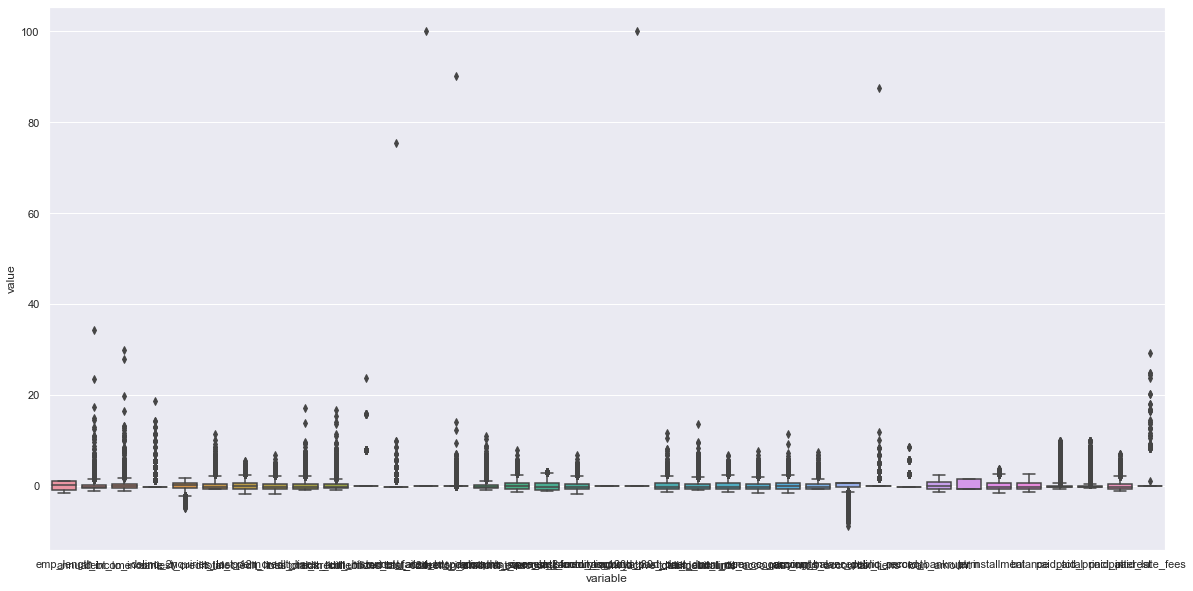

<Figure size 1440x720 with 0 Axes>

In [19]:
get_boxplot(scaled_features_df)

As we can see the data is more comparable in the ranges for different columns now so no 1 feature will overdominate.

In [20]:
def remove_outliers(df, x):
    # Set Limits
    '''q10, q90 = np.percentile(df[x], 10), np.percentile(df[x], 90)
    iqr = q90 - q10
    cut_off = iqr * 1.5
    lower, upper = q10-cut_off ,  q90 + cut_off
    df[df[x]>upper] = upper
    df[df[x]<lower] = lower
    print('Outliers of "{}" are removed\n'.format(x))
    return df'''
    
    q25, q75 = np.percentile(df[x], 25), np.percentile(df[x], 75)
    iqr = q75 - q25
    cut_off = iqr * 1.5
    lower, upper = q25-cut_off ,  q75 + cut_off
    df[df[x]>upper] = upper
    df[df[x]<lower] = lower
    print('Outliers of "{}" are removed\n'.format(x))
    return df

In [21]:
import numpy as np
for item in columns:
    scaled_features_df= remove_outliers(scaled_features_df, item)
scaled_features_df.head()

Outliers of "emp_length" are removed

Outliers of "annual_income" are removed

Outliers of "debt_to_income" are removed

Outliers of "delinq_2y" are removed

Outliers of "earliest_credit_line" are removed

Outliers of "inquiries_last_12m" are removed

Outliers of "total_credit_lines" are removed

Outliers of "open_credit_lines" are removed

Outliers of "total_credit_limit" are removed

Outliers of "total_credit_utilized" are removed

Outliers of "num_collections_last_12m" are removed

Outliers of "num_historical_failed_to_pay" are removed

Outliers of "current_accounts_delinq" are removed

Outliers of "total_collection_amount_ever" are removed

Outliers of "current_installment_accounts" are removed

Outliers of "accounts_opened_24m" are removed

Outliers of "months_since_last_credit_inquiry" are removed

Outliers of "num_satisfactory_accounts" are removed

Outliers of "num_accounts_120d_past_due" are removed

Outliers of "num_accounts_30d_past_due" are removed

Outliers of "num_active_

,emp_length,annual_income,debt_to_income,delinq_2y,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,total_credit_utilized,...,tax_liens,public_record_bankrupt,loan_amount,term,installment,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,-0.133486,-0.133486,-0.133486,-0.133486,-0.133486,-0.133486,-0.133486,-0.133486,-0.133486,-0.133486,...,-0.133486,-0.133486,-0.133486,-0.133486,-0.133486,-0.133486,-0.133486,-0.133486,-0.133486,-0.133486
1,-0.133486,-0.133486,-0.133486,-0.133486,-0.133486,-0.133486,-0.133486,-0.133486,-0.133486,-0.133486,...,-0.133486,-0.133486,-0.133486,-0.133486,-0.133486,-0.133486,-0.133486,-0.133486,-0.133486,-0.133486
2,0.217069,0.217069,0.217069,0.217069,0.217069,0.217069,0.217069,0.217069,0.217069,0.217069,...,0.217069,0.217069,0.217069,0.217069,0.217069,0.217069,0.217069,0.217069,0.217069,0.217069
3,-0.133486,-0.133486,-0.133486,-0.133486,-0.133486,-0.133486,-0.133486,-0.133486,-0.133486,-0.133486,...,-0.133486,-0.133486,-0.133486,-0.133486,-0.133486,-0.133486,-0.133486,-0.133486,-0.133486,-0.133486
4,-0.315962,-0.315962,-0.315962,-0.315962,-0.315962,-0.315962,-0.315962,-0.315962,-0.315962,-0.315962,...,-0.315962,-0.315962,-0.315962,-0.315962,-0.315962,-0.315962,-0.315962,-0.315962,-0.315962,-0.315962


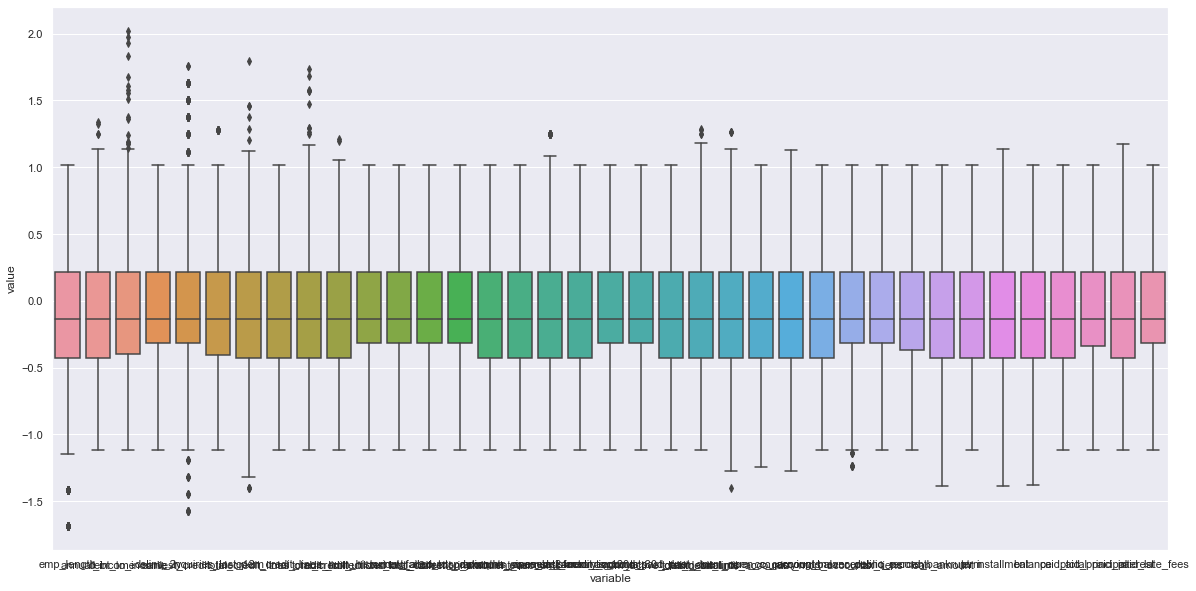

<Figure size 1440x720 with 0 Axes>

In [22]:
get_boxplot(scaled_features_df)

The boxplot shows that most of the outliers have been handled and the range of values for the column is also comparable.

In [23]:
# using one hot encoding on the categorical variables 
obj_columns = list(loan_obj)
for col in obj_columns:
    print(col + ":" + str(len(loan_obj[col].unique())))
# removing column with more than 10 categories
loan_obj.drop(["emp_title","state","loan_purpose","sub_grade"],axis=1,inplace=True)
loan_obj_hot = pd.get_dummies(loan_obj,drop_first=True)
loan_obj_hot.head()

emp_title:4741
state:50
homeownership:3
verified_income:3
loan_purpose:12
application_type:2
grade:7
sub_grade:32
issue_month:3
loan_status:6
initial_listing_status:2
disbursement_method:2


C:\Users\asadt\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,homeownership_OWN,homeownership_RENT,verified_income_Source Verified,verified_income_Verified,application_type_joint,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,issue_month_Jan-2018,issue_month_Mar-2018,loan_status_Current,loan_status_Fully Paid,loan_status_In Grace Period,loan_status_Late (16-30 days),loan_status_Late (31-120 days),initial_listing_status_whole,disbursement_method_DirectPay
0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0
1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0
2,0,1,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0
4,0,1,0,1,1,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0


In [24]:
clean_data = pd.concat([scaled_features_df,loan_obj_hot],axis=1)
scaled_features_df.head()

,emp_length,annual_income,debt_to_income,delinq_2y,earliest_credit_line,inquiries_last_12m,total_credit_lines,open_credit_lines,total_credit_limit,total_credit_utilized,...,tax_liens,public_record_bankrupt,loan_amount,term,installment,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,-0.133486,-0.133486,-0.133486,-0.133486,-0.133486,-0.133486,-0.133486,-0.133486,-0.133486,-0.133486,...,-0.133486,-0.133486,-0.133486,-0.133486,-0.133486,-0.133486,-0.133486,-0.133486,-0.133486,-0.133486
1,-0.133486,-0.133486,-0.133486,-0.133486,-0.133486,-0.133486,-0.133486,-0.133486,-0.133486,-0.133486,...,-0.133486,-0.133486,-0.133486,-0.133486,-0.133486,-0.133486,-0.133486,-0.133486,-0.133486,-0.133486
2,0.217069,0.217069,0.217069,0.217069,0.217069,0.217069,0.217069,0.217069,0.217069,0.217069,...,0.217069,0.217069,0.217069,0.217069,0.217069,0.217069,0.217069,0.217069,0.217069,0.217069
3,-0.133486,-0.133486,-0.133486,-0.133486,-0.133486,-0.133486,-0.133486,-0.133486,-0.133486,-0.133486,...,-0.133486,-0.133486,-0.133486,-0.133486,-0.133486,-0.133486,-0.133486,-0.133486,-0.133486,-0.133486
4,-0.315962,-0.315962,-0.315962,-0.315962,-0.315962,-0.315962,-0.315962,-0.315962,-0.315962,-0.315962,...,-0.315962,-0.315962,-0.315962,-0.315962,-0.315962,-0.315962,-0.315962,-0.315962,-0.315962,-0.315962


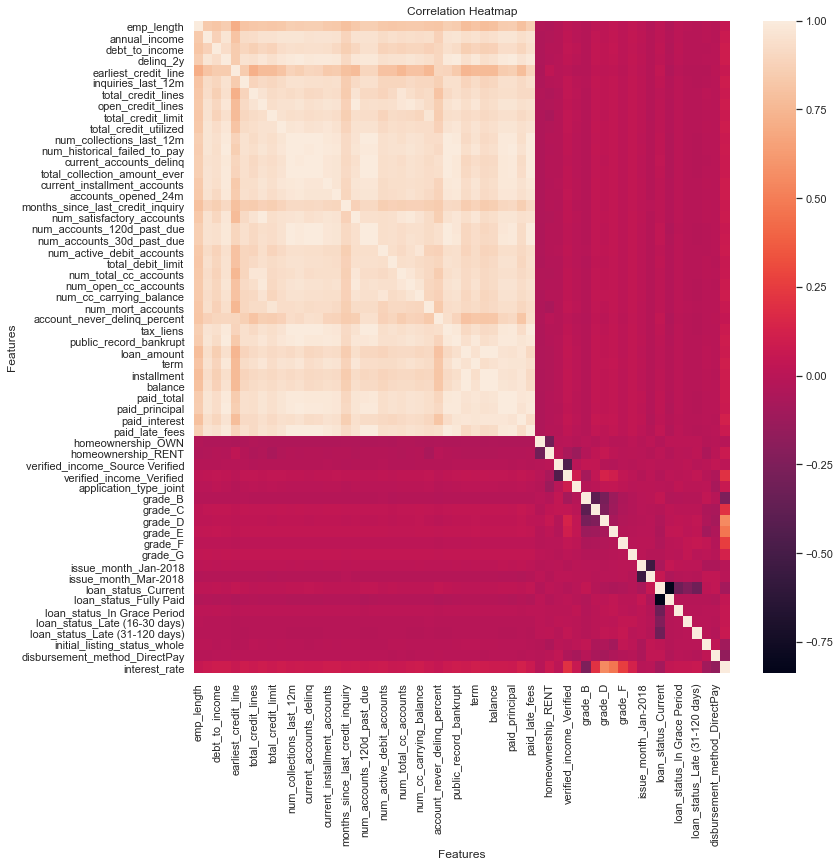

In [25]:
#plotting correlation heatmap
clean_data_tr = pd.concat([clean_data,y],axis=1)
plt.figure(figsize=(12,12))
sns.heatmap(clean_data_tr.corr())
plt.title("Correlation Heatmap")
plt.xlabel("Features")
plt.ylabel("Features")
plt.show()

The heatmap shows the correlation of all the features with each other.For example We can see that our target interest_rate is highly positively correlated with grade_D and highly negative correlated with grade_B

In [26]:
# Performing PCA to reduce dimensionality of the data
from sklearn.decomposition import PCA

pca = PCA(n_components = 20).fit(clean_data)
print(pca.explained_variance_ratio_.cumsum()) 
data_new = pca.transform(clean_data)

[0.66644134 0.71017166 0.74958623 0.78517512 0.81725917 0.83956195
 0.85785496 0.87448654 0.88926025 0.90240565 0.91531879 0.92711727
 0.9385254  0.94760458 0.95534507 0.96252155 0.96764432 0.97175708
 0.97537383 0.97865322]


As we can see 97.8% variance is covered in just 30 pca features.Hence we just need this 30 features to retain a lot of information and get good results.

# Model Training

In [27]:
# implementing linear regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(clean_data,y,test_size=0.2,random_state =42)
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [28]:
y_pred = lr.predict(X_test)

In [29]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.9006829961601617
Mean Squared Error: 1.1909214658790048
Root Mean Squared Error: 1.0912934829270287


<AxesSubplot:xlabel='interest_rate'>

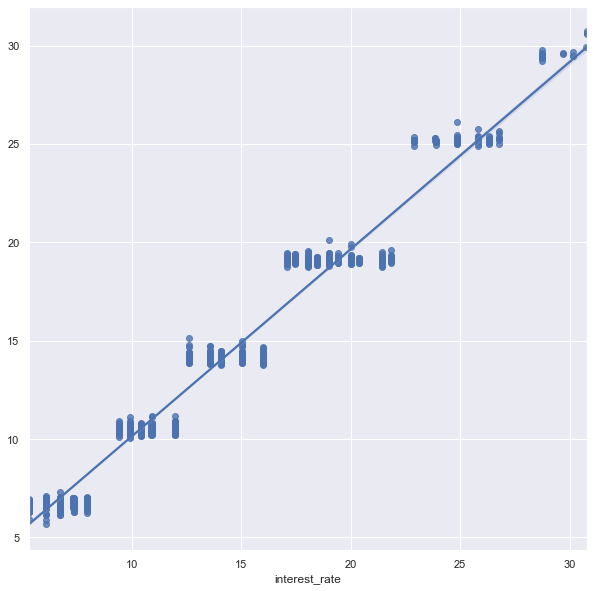

In [30]:
# visualising the regression line using the predictions
plt.figure(figsize=(10,10))
sns.regplot(x=y_test, y=y_pred)

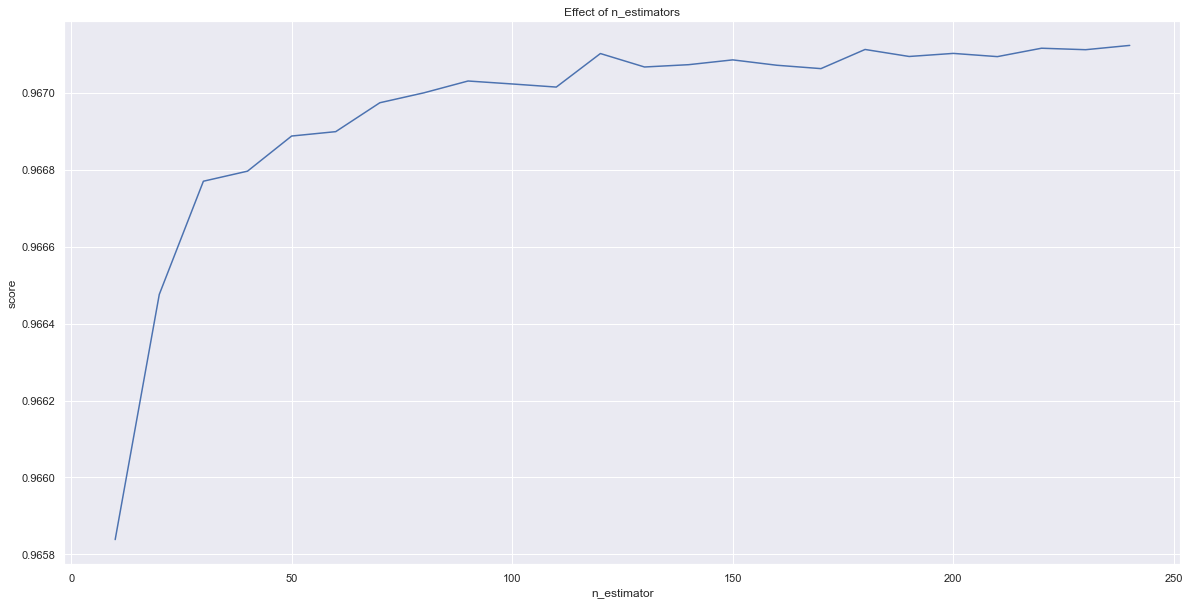

In [31]:
from sklearn.ensemble import RandomForestRegressor
cls = RandomForestRegressor(n_estimators=250, criterion='mse', max_depth=30)
estimators = np.arange(10, 250, 10) # 10 to 250 increased with 10
scores = []
for n in estimators:
    cls.set_params(n_estimators=n)
    cls.fit(X_train, y_train)
    scores.append(cls.score(X_train, y_train))
plt.title("Effect of n_estimators")
plt.xlabel("n_estimator")
plt.ylabel("score")
plt.plot(estimators, scores)

In [32]:
import numpy
from sklearn import linear_model
cls = RandomForestRegressor(n_estimators=250, criterion='mse', max_depth=30)#cls = RandomForestRegressor(n_estimators=150)

cls.fit(X_train, y_train)#We are training the model with RBF'ed data

scoreOfModel = cls.score(X_train, y_train)


print("Score is calculated as: ",scoreOfModel)

Score is calculated as:  0.9671138998760997


In [33]:
y_pred = cls.predict(X_test)
y_pred

array([ 7.30215227, 14.38526283, 14.70191866, ...,  6.45803715,
       19.34174537, 10.84987133])

In [34]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.9535615602862244
Mean Squared Error: 1.4039393067156534
Root Mean Squared Error: 1.1848794481784437


<AxesSubplot:xlabel='interest_rate'>

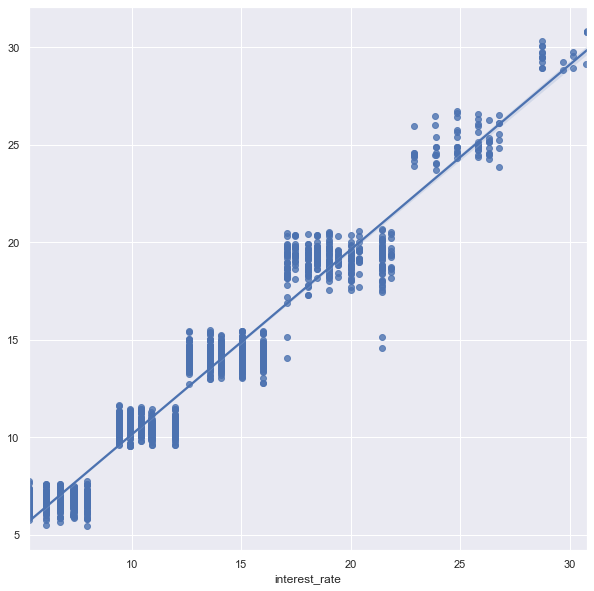

In [35]:
# visualising the regression line using the predictions
plt.figure(figsize=(10,10))
sns.regplot(x=y_test, y=y_pred)

# Assumptions

Some of the assumptions we have made in the data are:-

1- As we are using the linear regression we are assuming that the features are linearly dependent.

2- I am using 20 PCA components and assuming that those components cover most of the variance in the data.

# Model improvements

1- Collection of more data is always good to improve performance of the model.

2- Ensemble methods like bagging and boosting can be used to improve the model.

3- Grid search can be used to find the perfect parameters for the regression models.

4- Different parameter can be tried for the models and then use the best performing model.

5- Tried different ml models for regression like ridge regression and compare its result with the models we have used.